# ECE 466 Homework 1
---
__Spring 22__
__Due 1/27/2022__

* You can collaborate on homeworks and turn in a homework for 2 people.
* You start with 12 bonus points. Think of it as me giving you points for researching markdown, jupyter notebooks, etc.
* Include your codes and answers within the cells that are requested. Do not create additional cells. 
* Double click on any cell to see the raw text that generates it. `shift+enter` runs a cell and shows you an output. Feel free to play with it but please return the question and description cells in the original format.
* You can find markdown tutorials and guides by simple google search. Cheatsheets should be more useful if you are short on time.
* Ask your questions in the [discussion forums in D2L](https://d2l.msu.edu/d2l/le/1382712/discussions/List). You can post in homework or coding related. If it's not specific to this homework $\rightarrow$ Coding Related.
* Office hours T-Th 4-5 pm.
* __Upload the .ipynb document and a generated .html in a zip where all of these have the name in the following format:__ `emre_sofuoglu.ipynb` 
* For html generation, you can google search. VSCode users: CTRL+SHIFT+P $\rightarrow$ type 'html' $\rightarrow$ Jupyter: Export to HTML

> I will import the necessary modules for you. Please only use these modules for now. 

**Your Name: [Name Surname]**

 (Double Click Here to edit. Delete this expression after edit.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1:  
\[18 points\]
For each $x[n]$ given below:
   - Plot the signal using `np.stem()` for $-20\leq n\leq20$.
   - Is the signal an energy signal or a power signal?
   - Is it periodic or aperiodic? What's the period if it is periodic?
   - Is it even or odd?

a. $x[n]= (1.2)^{-n} \sin{(\frac{\pi n}{4})} u[n]$.

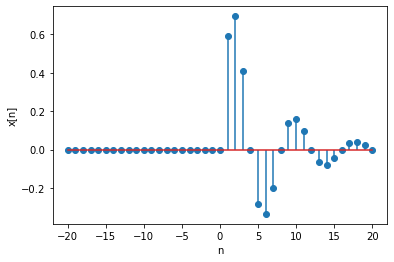

In [2]:
## Your code for plotting the signal in 1.a. should be in this cell.
n = np.arange(-20, 21)
u = np.zeros_like(n)
u[n] = n>=0
x = np.zeros_like(n, dtype=float)
x[n] = 1.2**(-n)*np.sin((np.pi/4)*n)*u[n]

plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

<span style="color: red;"> Your answers for signal 1.a. should be written in this cell. (Double click on this text)<span>
- This is an energy signal as the integral of the magnitude converges to a constant value.
- This signal is aperiodic as the values constantly drop, so $x[n]\neq x[n+N]$ for any $N$.
- This signal doesn't have any type of symmetry, so it's neither even, nor odd.

b. $x[n]= \frac{\sin{(\pi n)}}{\sin{(\frac{\pi n}{10})}}$.

C:\Users\emres\AppData\Local\Temp/ipykernel_10556/475937016.py:2: RuntimeWarning: invalid value encountered in true_divide
  x[n] = np.sin(np.pi*n)/np.sin((np.pi/10)*n)


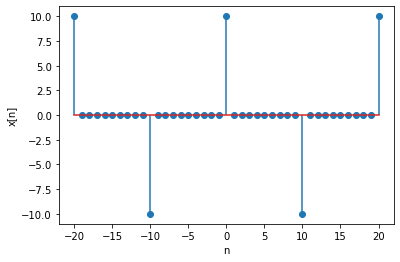

In [3]:
## Your code for plotting the signal in 1.b. should be in this cell.
x[n] = np.sin(np.pi*n)/np.sin((np.pi/10)*n)
x[0] = 10 # Numeric error should be taken into account.
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

<span style="color: red;"> Your answers for signal 1.b. should be written in this cell. <span>

- This is a power signal with power $2*10^2/20=10$ Watts. 
- It is periodic with period $20$.
- The signal has even symmetry.

c. $x[n] = \cos{(\frac{\pi n}{4})}\sin{(\frac{\pi n}{3})}$.

Power is: 0.25


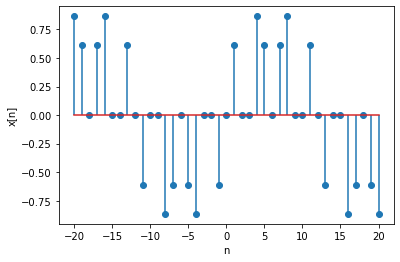

In [4]:
## Your code for plotting the signal in 1.c. should be in this cell.
x[n] = np.cos(np.pi/4*n)*np.sin(np.pi/3*n)
pow = sum(x[np.arange(-12,13)]**2)/24
print('Power is: {:.2f}'.format(pow))

plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

<span style="color: red;"> Your answers for signal 1.c. should be written below in this cell. <span>
- This is a power signal with power $0.25$ Watts.
- A periodic signal with period 24.
- Odd symmetry.

#### 2:
\[15\]
Determine whether the following systems are linear, shift-invariant, memoryless, causal, and BIBO stable:

a. $y[n] = x[-n]$.

b. $y[n] = e^{x[n]}$. 

c. $y[n] = g[n]x[n]$ with any given $g[n]$. 

<span style="color: red;"> Your answers for question 2. should be written and executed below in this cell. <span>

a. 
- Linear: $y_1[n] = x_1[-n]$, $y_2[n] = x_2[-n]$, $y[n] = T[a_1x_1[n]+a_2x_2[n]] = a_1 x_1[-n] + a_2 x_2[-n] = a_1 y_1[n] + a_2 y_2[n]$.
- Time varying: $y[n-n_0] = x[-n-n_0] = T[x[n+n_0]]$
- Dynamic: $y[1] = x[-1]$.
- Non-causal: $y[-1] = x[1]$.
- BIBO stable: $|x[n]|\leq M, \forall n$, then $|y[n]|\leq M \forall n$.

b. 
- Non-linear: $y[n] = T[a_1x_1[n]+a_2x_2[n]] = e^{a_1x_1[n]+a_2x_2[n]} = e^{a_1x_1[n]} e^{a_2x_2[n]} \neq a_1e^{x_1[n]} + a_2e^{x_2[n]}=a_1y_1[n] + a_2y_2[n]$.
- Time invariant: $y[n-n_0] = e^{x[n-n_0]} = T[x[n-n_0]]$.
- Static: $y[n_0] = T[x[n_0]]$.
- Causal: If static, then causal.
- BIBO stable: $|x[n]|\leq M, \forall n$, then $|y[n]|= |e^{x[n]}|\leq e^{|x[n|} \leq e^M \forall n$.

c. 
- Linear: $y_1[n] = g[n]x_1[n]$, $y_2[n] = g[n]x_2[n]$, $y[n] = T[a_1x_1[n]+a_2x_2[n]] = g[n](a_1x_1[n]+a_2x_2[n]) = a_1g[n]x_1[n]+a_2g[n]x_2[n] = a_1y_1[n]+a_2y_2[n]$.
- Time varying: $y[n-k] = g[n-k] x[n-k] \neq T[x[n-k]] = g[n] x[n-k]$.
- Static: $y[n_0] = T[x[n_0]]$.
- Causal: If static, then causal.
- BIBO unstable: $|x[n]|\leq M, \forall n$, then $|y[n]|= |g[n]x[n]|\leq |g[n]||x[n]|\leq M|g[n]|$. Unless $|g[n]|\leq K$, for some $K\in \mathbb{R}$.

#### 3:
\[15\] The continuous time signal $x(t) = \frac{\sin{(10\pi t)}}{10 \pi t}$ is is the input to an ideal A/D converter with sampling period ܶ$T$, to obtain the discrete-time signal $x[n] = \frac{\sin{\frac{(\pi n)}{2}}}{\frac{\pi n}{2}}$. 

a. What is the ideal $T$ for such a conversion?

b. Is your choice of $T$ unique? If not, what other $T$ s can be used? 

<span style="color: red;"> Your answers for question 3. should be written and executed in this cell. <span>

a. $T=1/20$ s

b. __It is unique, due to the denominator.__ Otherwise, there would have been infinitely many $T$ 's that achieve the same discrete signal and it would be defined as $T = \frac{4k+1}{20}$, for all integer $k$. To see this, we can start our sampling from analog signal with an additional angle of $2\pi k$ as $$\sin(2\pi\frac{5}{T} n) = \sin(2\pi\frac{5}{T} n+ 2\pi k_0) = \sin(2\pi\frac{5+T k_0}{T} n)$$ for any integer $k_0$. Then, we need $\frac{5+T k_0}{T}=0.25$, which makes $T = \frac{1-4k_0}{20}= \frac{4k+1}{20}$, where $k=-k_0$ are all integers.

C:\Users\emres\AppData\Local\Temp/ipykernel_10556/989200301.py:3: RuntimeWarning: invalid value encountered in true_divide
  x[n] = np.sin(2*np.pi*5*T_s*n)/(2*np.pi*5*T_s*n)


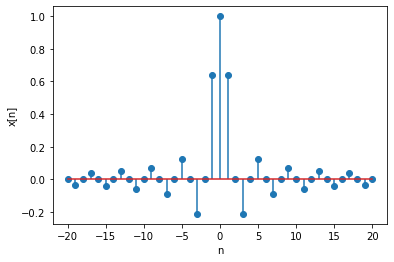

In [5]:
# Here's how that looks like. Feel free to play with T to see how it differs.
T_s = 1/20
x[n] = np.sin(2*np.pi*5*T_s*n)/(2*np.pi*5*T_s*n)
x[0] = 1 # Numeric error should be taken into account.
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

#### 4:
\[20\]
Consider the following continuous-time sinusoidal signal: $x_a(t) = \sin{(2\pi F_0 t)}$.

The sampled version of this signal can be described by it's values every $T_s$ seconds. Namely, $x[n] = x_a(n T_s) = \sin(2\pi\frac{F_0}{F_s} n)$.

a. Plot the signals $x[n]$ with given $F_0$ for $0\leq n\leq 99$. $F_s = 5000 = 5$ kHz. Explain the similarities and differences between these plots.
- $F_0 = 500 = 0.5$ kHz.
- $F_0 = 2000 = 2$ kHz.
- $F_0 = 3000 = 3$ kHz.
- $F_0 = 4500 = 4.5$ kHz.

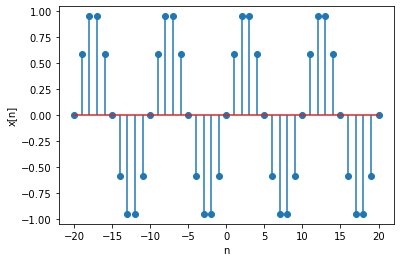

In [6]:
# Give the code of your answer for signal with F_0=0.5kHz.
F_s = 5000
F_0 = 500
x[n] = np.sin(2*np.pi*(F_0/F_s)*n)
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

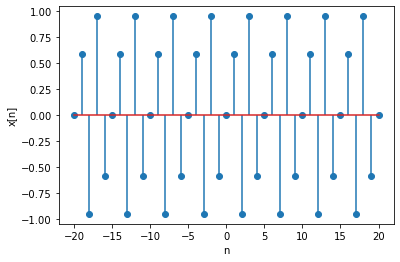

In [7]:
# Give the code of your answer for signal with F_0=2kHz.
F_0 = 2000
x[n] = np.sin(2*np.pi*(F_0/F_s)*n)
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

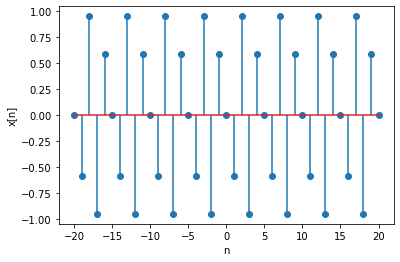

In [8]:
# Give the code of your answer for signal with F_0=3kHz.
F_0 = 3000
x[n] = np.sin(2*np.pi*(F_0/F_s)*n)
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

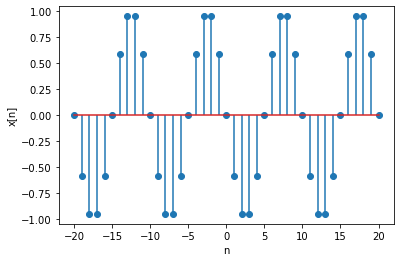

In [9]:
# Give the code of your answer for signal with F_0=4.5kHz.
F_0 = 4500
x[n] = np.sin(2*np.pi*(F_0/F_s)*n)
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

What similarities do you observe? What differences?:
<!-- Your typed answers for question 3. should be written here. Make them bulleted please. -->
- The frequencies fold around $5/2=2.5$ kHz. So the $3000$ Hz signal has the same period with $2000$, and $4500$ has the same period as $500$.
- The phases become negative for folded signals. This is because in discrete signal, $F_0=4500$ behaves the same as $F_0=-500$ and $\sin(.)$ is an odd symmetrical function. 

_Note: All of these are due to fundamental frequency of a discrete periodic signal being in range $(-1/2, 1/2)$. This effectively tells us that if we do not have at least two values at every period, our signal cannot be periodic. Any signals having frequencies outside this range have their frequencies folded until it gets within the range._

b. Suppose that $F_0=2$ kHz and $F_s = 50$ kHz.
* i. Plot $x[n]$. What is the frequency $f_0$ of $x[n]$?
* ii. Plot the signal $y[n] = x[2n]$ . Is this a sinusoidal? What is the frequency?

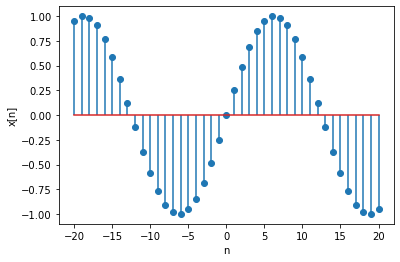

In [10]:
# Code for 4.b.i.
F_0 = 2000
F_s = 5e4
x[n] = np.sin(2*np.pi*(F_0/F_s)*n)
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

<span style="color: red;"> Type the frequency of $x[n]$ here. <span>

$f_0 = \frac{F_0}{F_s} = \frac{1}{25} = 0.04$.

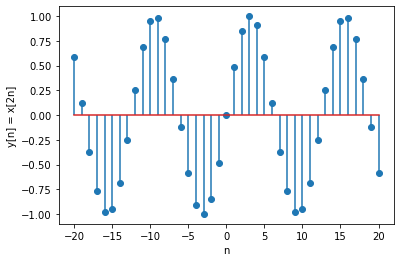

In [11]:
# Code for 4.b.ii.
y = np.zeros_like(x)
y[n] = np.sin(2*np.pi*(F_0/F_s)*2*n) # I didn't sample from x[2n] as negative values multiplied by two behave in a weird manner. 
plt.stem(n, y[n])
plt.xlabel('n')
plt.ylabel('y[n] = x[2n]')
plt.show()

<span style="color: red;"> Type the frequency of $y[n]$ here. <span>

_We resample $x[n]$, when we set $y[n]=x[2n]$. The resampling rate is every two indices of $x[n]$. Intuitively, this should mean that the period of $x[n]$ is halved after the conversion. So our frequency doubles to $0.08$. Note that the period is $25/2=12.5$. This means that we cannot get integer indices at every period. So, in essence we can get $y[n]=y[n+N]$ only when $N=25*k$ where $k$ is an integer. Thus, the period of $y[n]$ is still $25$, which makes the frequency $f_0=1/25=0.04$. Check the above plot to see that the signal indeed does not repeat itself at every $12.5$ indices, as it has integer indices._

- $f_0 = 1/N_y$
- $y[n] = x[2n] = y[n+N_y] = x[2n+2*N_y]$
- $2*N_y = N_x \rightarrow N_y = 12.5k$, where $k$ is an integer.
- $N_y$ has to be integer, which applies only to even $k$. Thus, the effective period of $y[n]$ doubles.
- $N_y = 12.5*2 k'= 25 k'$, where $k'$ is any integer.
- $f_0 = 1/25 = 0.04$

#### 5: 
\[20\]
An analog signal $x_a(t) = \sin(480\pi t) + 3 \sin (720\pi t)$ is sampled 600 times per second. 

(a) Determine the Nyquist sampling rate for $x_a(t)$. 


<span style="color: red;"> 5 (a) <span>

_Nyquist sampling rate is $T_s = 1/720$ s or Nyquist frequency is $F_s = 720$ Hz._


(b) Determine the folding frequency. 


<span style="color: red;"> 5 (b) <span>

_Folding frequency for the sampling given above is $F_{s_0}/2 = 600/2 = 300$._

(c) What are the frequencies, in radians, in the resulting discrete time signal $x[n]$? 

<span style="color: red;"> 5 (c) <span>

$x[n] = \sin(2 \pi \frac{240}{600} n) + 3\sin(2 \pi \frac{360}{600} n) = \sin(2 \pi (0.4) n) + 3\sin(2 \pi (0.6) n) = \sin(2 \pi (0.4) n) + 3\sin(2 \pi (-0.4) n) = \sin(0.8 \pi n) - 3\sin(0.8 \pi n) = -2 \sin(0.8\pi n)$

_Notice that I set $0.6=-0.4$. This is because we cannot have a discrete frequency above $0.5$. So we subtract $2\pi$ from the function operator of sine, which makes $2\pi(0.6)n-2\pi n = 2\pi(-0.4)$. $0.8 \pi$ is the angular frequency of $x[n]$. Whenever you see an $f_0$ outside the range (-1/2,1/2) you should compute the distance to the closest integer, and if it is smaller, set the sign negative. E.g. $$f_0 = 1.45 \rightarrow (1+0.45) \rightarrow 0.45$$, or $$f_0 = -3.55\rightarrow (-4+0.45) \rightarrow 0.45$$, or $$f_0 = 6.65 \rightarrow (7-0.35) \rightarrow -0.35$$, etc._


(d) If $x[n]$ is passed through an ideal D/A converter, what is the reconstructed signal 
$Y_a(t)$?

<span style="color: red;"> 5 (d) <span>

Using the digital signal with frequency within the range $(-1/2, 1/2)$, we replace $n$ with $t/T$ or $tF$ where $F=600$ Hz or $T=1/600$ s. We always use the fundamental frequency for D/A conversion.

$Y_a(t) = x[t/T] = -2 \sin(0.8\pi 600 t) = -2\sin(480\pi t)$